# Density Matrix Renormalization Group (DMRG) algorithm

DMRG is a iterative optimization algorithm for ground state search of local Hamiltonian. It fits naturally the MPS, so if you can represent your Hamiltonian as a `Tenet.MPO`, you can run the DMRG algorithm to find the ground energy of the Hamiltonian using the `Tenet.DMRG.dmrg!` function.

In [1]:
using Tenet
using Plots

In [9]:
n = 100
J = 1.0
h = 1.0
χ = 128
H = Tenet.Models.ising_1d_mpo(n, h, J)

MatrixProductOperator (#tensors=100, #inds=299)

## 1-site DMRG

The 1-site DMRG is managed by the `method = Tenet.DMRG.Dmrg1()` kwarg in `dmrg!`.

In [10]:
nsweeps = 10

energy_dmrg1 = let ψ = rand(MPS; n, maxdim = χ, eltype = ComplexF64)
    energy = zeros(nsweeps)
    for i in 1:nsweeps
        _, energy[i] = Tenet.DMRG.dmrg!(ψ, H, 1; method = Tenet.DMRG.Dmrg1(), verbosity = 0)
    end
    energy
end

10-element Vector{Float64}:
 -126.94806362994741
 -126.96092627354032
 -126.96178336857263
 -126.96186885275958
 -126.96187576557891
 -126.9618765900563
 -126.96187671530163
 -126.96187673536033
 -126.96187673900918
 -126.96187673959822

## 2-site DMRG

The 2-site DMRG is managed by the `method = Tenet.DMRG.Dmrg2()` kwarg in `dmrg!`.

In [11]:
nsweeps = 10

energy_dmrg2 = let ψ = convert(MPS, ProductState(fill(ComplexF64[1,0], n)))
    energy = zeros(nsweeps)
    for i in 1:nsweeps
        _, energy[i] = Tenet.DMRG.dmrg!(ψ, H, 1; method = Tenet.DMRG.Dmrg2(), maxdim = χ, verbosity = 0)
    end
    energy
end

10-element Vector{Float64}:
 -126.90946879203908
 -126.95072267020943
 -126.95553621544427
 -126.95857709962301
 -126.96048375341927
 -126.96140685024237
 -126.96174964556438
 -126.96184131779626
 -126.96186767701009
 -126.96187478469312

## Comparison

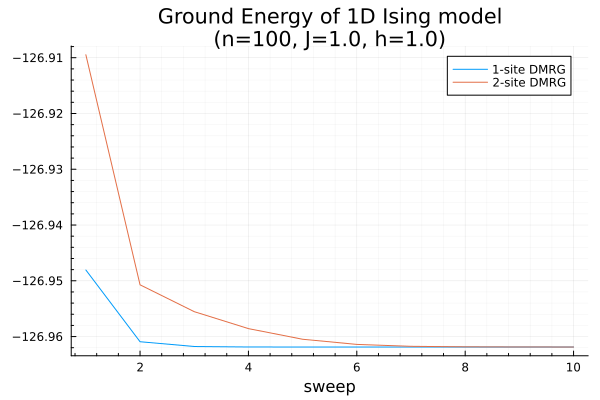

In [12]:
plot(-abs.(energy_dmrg1), label = "1-site DMRG", title="Ground Energy of 1D Ising model\n(n=$n, J=$J, h=$h)", xlabel = "sweep", minorgrid=true)
plot!(-abs.(energy_dmrg2), label = "2-site DMRG")